In [19]:
from tf_unet import unet, util, image_util
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
#import scipy
from scipy import misc
%matplotlib inline

In [20]:
#DATA_ROOT = "/Users/cesare.chung/int/01_CODE_UNET/NEW/"
DATA_ROOT = "D:/Cesare/tf_UNET_int/JPEGImages_used"

#masks_dir = sorted(glob.glob(DATA_ROOT+"/dataset/JPEGImages_used/resize/*_mask_viz_resized_mask_viz.png"))
masks_dir = sorted(glob.glob(DATA_ROOT+"/resize/*_mask_resized_mask.png"))
imgs_dir  = sorted(glob.glob(DATA_ROOT+"/resize/*_training_resized_training.png"))

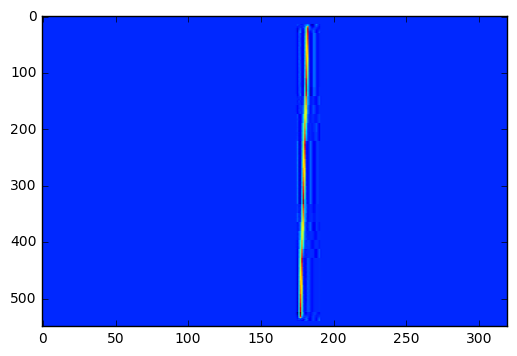

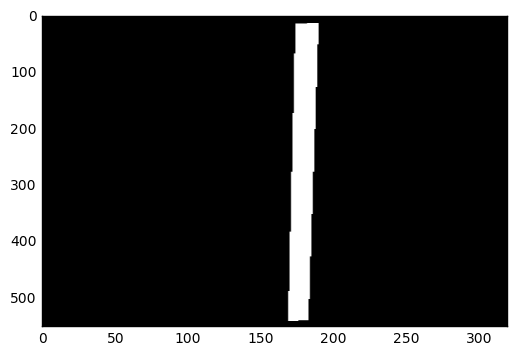

In [21]:
X_data=[]
for index,entry in enumerate(imgs_dir):
    img = misc.imread(entry)
    X_data.append(img)

Y_data=[]
for index,entry in enumerate(masks_dir):
    img = misc.imread(entry)
    Y_data.append(img)

X_data=np.array(X_data)
Y_data=np.array(Y_data)

plt.imshow(X_data[1,...,2], aspect="auto")   # X_data[i,...,j]. i = 1,..., number of samples; j = 1,2,3
plt.show()
plt.imshow(Y_data[1,...,], aspect="auto",cmap='gray')
plt.show()

In [22]:
data_provider = image_util.ImageDataProvider(DATA_ROOT+"/resize/*",data_suffix="_training_resized_training.png", mask_suffix="_mask_resized_mask.png")


Number of files used: 10


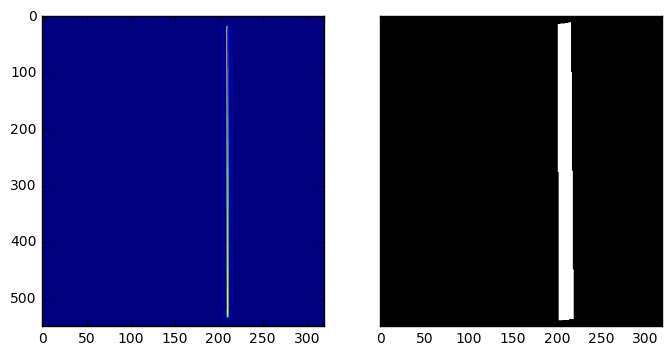

In [23]:
x_test, y_test = data_provider(1)

fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto",cmap='gray')
plt.show()

In [24]:
print(x_test.shape)
print(y_test.shape)

print(data_provider.channels)
print(data_provider.n_class)

(1, 550, 320, 3)
(1, 550, 320, 2)
3
2


In [25]:
net = unet.Unet(channels=data_provider.channels, n_class=data_provider.n_class, layers=3, features_root=64)

trainer = unet.Trainer(net, optimizer="adam")


2017-11-06 17:53:50,212 Layers 3, features 64, filter size 3x3, pool size: 2x2


In [26]:
path = trainer.train(data_provider, output_path="out", training_iters=32, epochs=10,dropout=0.75, display_step=2)

2017-11-06 17:54:05,403 Removing 'D:\Cesare\tf_UNET_int\prediction'
2017-11-06 17:54:05,404 Removing 'D:\Cesare\tf_UNET_int\out'
2017-11-06 17:54:05,412 Allocating 'D:\Cesare\tf_UNET_int\prediction'
2017-11-06 17:54:05,413 Allocating 'D:\Cesare\tf_UNET_int\out'
2017-11-06 17:55:08,598 Verification error= 29.4%, loss= 0.6906
2017-11-06 17:55:17,090 Start optimization
2017-11-06 17:55:39,254 Iter 0, Minibatch Loss= 0.5786, Training Accuracy= 0.9464, Minibatch error= 5.4%
2017-11-06 17:55:47,782 Iter 2, Minibatch Loss= 0.3573, Training Accuracy= 0.9411, Minibatch error= 5.9%
2017-11-06 17:55:55,642 Iter 4, Minibatch Loss= 0.3602, Training Accuracy= 0.9321, Minibatch error= 6.8%
2017-11-06 17:56:03,361 Iter 6, Minibatch Loss= 0.4198, Training Accuracy= 0.9429, Minibatch error= 5.7%
2017-11-06 17:56:11,950 Iter 8, Minibatch Loss= 0.3919, Training Accuracy= 0.9358, Minibatch error= 6.4%
2017-11-06 17:56:19,765 Iter 10, Minibatch Loss= 0.3117, Training Accuracy= 0.9340, Minibatch error= 6.6%


In [27]:
x_test, y_test = data_provider(1)


In [28]:
prediction = net.predict("./out/model.cpkt", x_test)

INFO:tensorflow:Restoring parameters from ./out/model.cpkt


2017-11-06 18:22:28,833 Restoring parameters from ./out/model.cpkt
2017-11-06 18:22:30,622 Model restored from file: ./out/model.cpkt


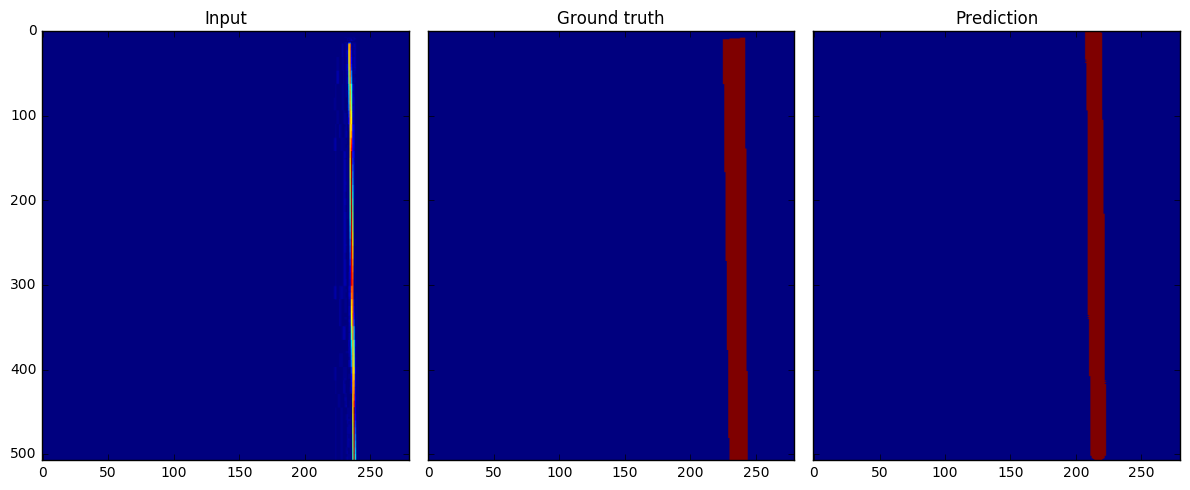

In [29]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()

plt.show()

In [30]:
unet.error_rate(prediction, util.crop_to_shape(y_test, prediction.shape))


0.51884139482564251

In [31]:
img = util.combine_img_prediction(x_test,y_test,prediction)
#util.save_image(img, "/Users/cesare.chung/int/mura_problem.png")
util.save_image(img, "D:/Cesare/tf_UNET_int/mura_problem.png")
